# Data Science - Web Scraping

## Tasks Today:

1) <b>Requests</b> <br>
 &nbsp;&nbsp;&nbsp;&nbsp; a) Importing <br>
 &nbsp;&nbsp;&nbsp;&nbsp; b) Using Requests <br>
2) <b>Beautiful Soup</b> <br>
 &nbsp;&nbsp;&nbsp;&nbsp; a) Importing <br>
 &nbsp;&nbsp;&nbsp;&nbsp; b) Using Beautiful Soup <br>
 &nbsp;&nbsp;&nbsp;&nbsp; c) .prettify() <br>
 &nbsp;&nbsp;&nbsp;&nbsp; d) Converting to a List <br>
 &nbsp;&nbsp;&nbsp;&nbsp; e) Extracting Beautiful Soup Elements <br>
 &nbsp;&nbsp;&nbsp;&nbsp; f) Assigning Variables from Beautiful Soup <br>
 &nbsp;&nbsp;&nbsp;&nbsp; g) .find() <br>
 &nbsp;&nbsp;&nbsp;&nbsp; h) .find_all() <br>
3) <b>Exercise</b> <br>

## Requests

### Importing

In [109]:
import requests

### Using Requests

In [110]:
page = requests.get('http://www.arthurleej.com/e-love.html')

In [111]:
# display result response
page

<Response [200]>

##### .content

In [112]:
# page.content

## Beautiful Soup

### Importing

In [113]:
from bs4 import BeautifulSoup

### Using Beautiful Soup

In [114]:
soup = BeautifulSoup(page.content, 'html.parser')
# soup

### .prettify()

In [115]:
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 3.2 Final//EN">
<html>
 <head>
  <title>
   Essay on Love by Arthur Lee Jacobson
  </title>
  <meta content="Trees,gardening, wild and domestic plant life are the specialty of author Arthur Lee Jacobson." name="description"/>
  <meta content="trees, gardening, wild plants, domestic plants, gardening author, gardening books, Arthur Lee Jacobson, A L J, A L Jacobson, Arthur Jacobson, arthur lee, plants, flowers, seattle, washington" name="keywords"/>
  <meta content="document" name="resource-type"/>
  <meta content="BBEdit 4.5" name="generator"/>
  <meta content="all" name="robots"/>
  <meta content="Gardening" name="classification"/>
  <meta content="global" name="distribution"/>
  <meta content="general" name="rating"/>
  <meta content="2001 Arthur Lee Jacobson" name="copyright"/>
  <meta content="eriktyme@eriktyme.com" name="author"/>
  <meta content="en-us" name="language"/>
 </head>
 <body alink="#33CC33" background="images/background1a.jpg" b

### Converting to a List

In [128]:
list(soup.children)[1]

'html'

### Extracting Beautiful Soup Elements

In [117]:
# .Tag allows for traversal through HTML page and extract other tags and text
[type(item) for item in list(soup.children)]

[bs4.element.Doctype,
 bs4.element.NavigableString,
 bs4.element.Tag,
 bs4.element.NavigableString]

### Assinging Variables from Beautiful Soup

In [118]:
html = list(soup.children)[2]
body = list(html.children)[3]
center = list(body.children)[4]
# center

### .find() <br>
<p>Find a specific instance of the parameter passed in</p>

In [119]:
soup.find('b')

<b>Love</b>

### .find_all() <br>
<p>Similar to .find(), except this will return all of them instead of one</p>

In [120]:
soup.find_all('b')[1]

<b>    Of the fourteen essays I'm writing, only this one treats an emotion. That love is the most important emotion is the deduction. I think other emotions may be as important, but are not so powerfully moving or interesting to most of us. Love is exciting. There is no need to justify choosing to write about it. Are not most songs love songs? Are not most novels stories featuring love?</b>

## Exercise <br>
<p>Using the Beautiful Soup library, grab the data from the following link: https://www.baseball-reference.com/teams/BOS/batteam.shtml. After getting the data, display only the year and batting average for each year (2017: .276). Lastly, plot the data on a preferred matplotlib chart.</p>

In [121]:
url = 'https://www.baseball-reference.com/teams/BOS/batteam.shtml'
page = requests.get(url)
page

<Response [200]>

In [122]:
soup = BeautifulSoup(page.content, 'html.parser')
all_years = soup.find_all('th', attrs = {'data-stat': 'year_ID'})
print(all_years[0])
all_years = all_years[1: ]
years = []
for item in all_years:
    years.append(list(item.find('a'))[0])
len(years)

<th aria-label="Year" class=" poptip sort_default_asc show_partial_when_sorting left" data-stat="year_ID" data-tip="A Star indicates an all-star that season.&lt;br&gt;A Ring indicates the player appeared in WS for winning team." scope="col">Year</th>


118

In [123]:
all_ba = soup.find_all('td', attrs = {'data-stat': 'batting_avg'})
list(all_ba[0].children)
ba = []
for item in all_ba:
    ba.append(list(item.children)[0])
len(ba)

118

In [129]:
import pandas as pd
import numpy as np
# ba_df = pd.DataFrame({'year': years}, {'ba': ba})
df = pd.DataFrame(np.array(years), columns = ['Year'])
df['BA'] = pd.DataFrame(np.array(ba))
df['Year'] = df['Year'].astype(int)
df['BA'] = df['BA'].astype(float)
df.head()

,Year,BA
0,2018,0.268
1,2017,0.258
2,2016,0.282
3,2015,0.265
4,2014,0.244


In [125]:
df.head()

,Year,BA
0,2018,0.268
1,2017,0.258
2,2016,0.282
3,2015,0.265
4,2014,0.244


Text(0.5,1,'Redsox Averge Batting vs Year')

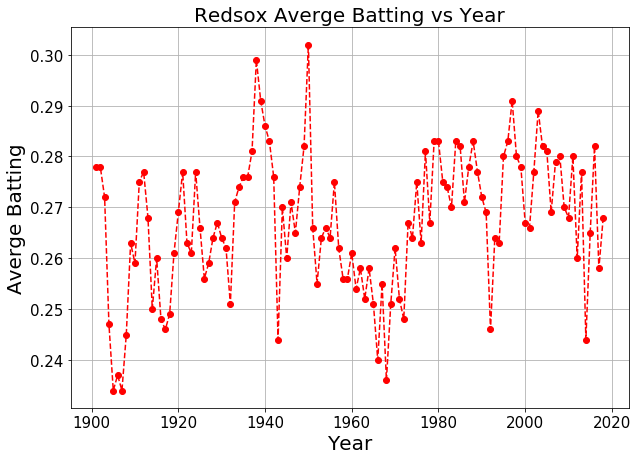

In [126]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10, 7))
plt.plot(df['Year'], df['BA'], 'r--o')
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Averge Batting', fontsize = 20)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.grid(True)
plt.title('Redsox Averge Batting vs Year', fontsize = 20)

In [134]:
page = requests.get('https://www.baseball-reference.com/teams/BOS/batteam.shtml')

soup = BeautifulSoup(page.content, 'html.parser')

sox_avg = soup.find_all('td', attrs = {'data-stat': 'batting_avg'})

years = soup.find_all('th', attrs = {'data-stat': 'year_ID'})

years.pop(0)

bavg = {}

for index in range(len(sox_avg)):
    year = int(years[index].get_text())
    bavg[year] = sox_avg[index].get_text()

In [ ]:
plt.figure(figsize(10,10))